In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('.\ds_titanic.csv')

In [6]:
df_copy=df.copy()

In [7]:
df_copy.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# a) Exploración inicial¶

In [8]:
df_copy.shape

(891, 12)

In [9]:
df_copy.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df_copy.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b>Descripción:</b><br>
* PassengerId: Identificador del pasajero dentro de la tabla<br>
* Survived: Indica si el pasajero sobrevivió<br>
* Pclass: clase de pasajero primera(1), segunda (2) o tercera (3) <br>
* Name: Nombre del pasajero <br>
* Sex: Sexo del pasajero<br>
* Age: Edad<br>
* SibSp: Cantidad de hermanas/os o esposas/os a bordo<br>
* Parch: Cantidad de padres o hijos a bordo<br>
* Ticket: Número de ticket<br>
* Fate: Tarifa <br>
* Cabin: Cabina en la cual se encuentra alojado el pasajero<br>
* Embarked: Puerta de embarque<br>

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


V SUPERVIVENCIA

In [25]:
df_copy['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

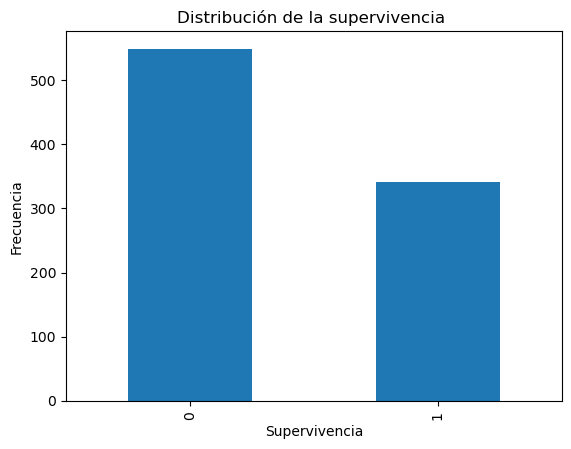

In [27]:
v_survived=df_copy['Survived'].value_counts().plot.bar(title="Distribución de la supervivencia ",xlabel="Supervivencia",ylabel="Frecuencia")

EDAD DE LOS PASAJEROS

Text(0, 0.5, 'Frecuencia')

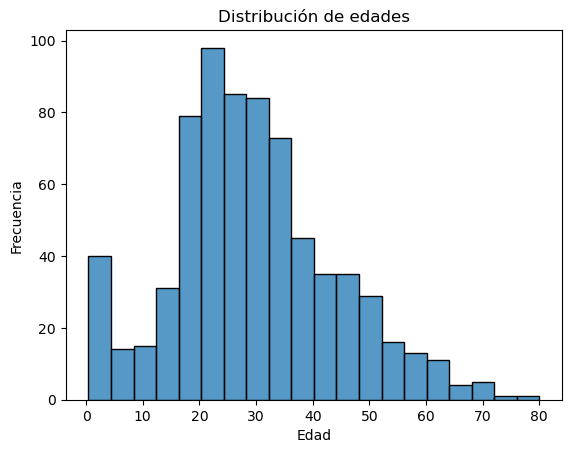

In [13]:
v_age_hist= sns.histplot(data=df_copy['Age'])
v_age_hist.set_title('Distribución de edades')
v_age_hist.set_xlabel('Edad')
v_age_hist.set_ylabel('Frecuencia')  

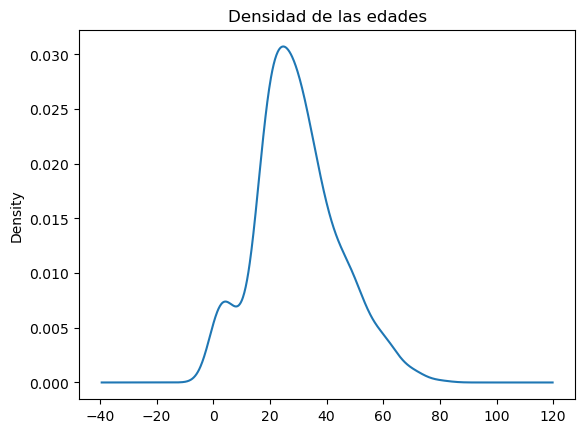

In [14]:
v_age_dens=df_copy['Age'].plot.kde(title="Densidad de las edades",xlabel="Age",ylabel="Densidad")

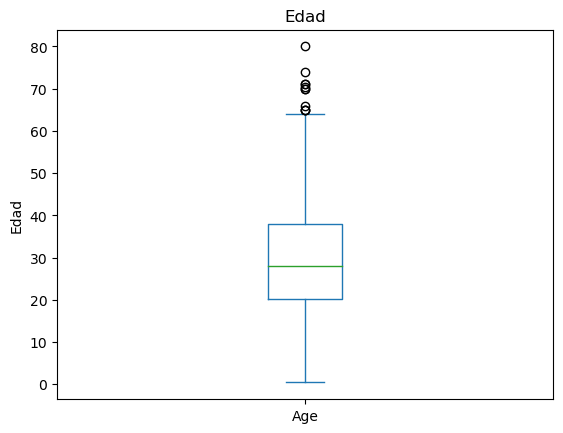

In [19]:
v_age_box=df['Age'].plot.box(title="Edad",xlabel=" ",ylabel="Edad")

CLASE DE LOS PASAJEROS

In [18]:
df_copy['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

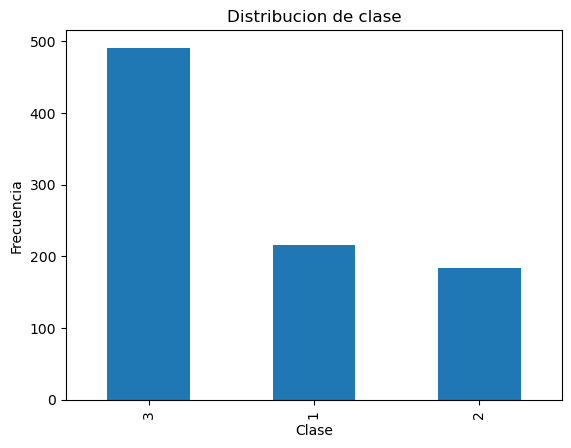

In [17]:
v_class_bar=df_copy['Pclass'].value_counts().plot.bar(title="Distribucion de clase",xlabel="Clase",ylabel="Frecuencia")

SEXO DE LOS PASAJEROS

In [20]:
df_copy['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

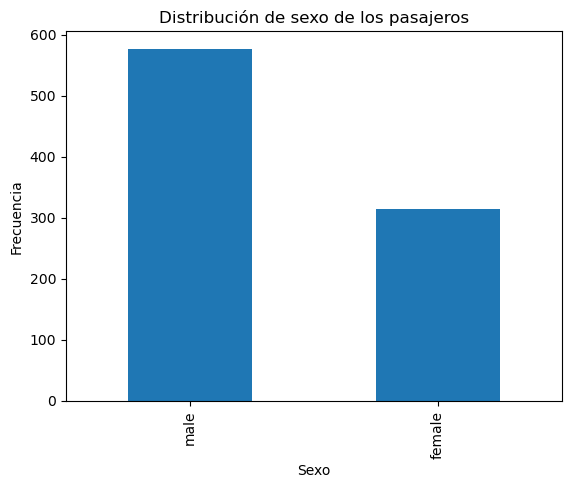

In [22]:
v_SEX_bar=df_copy['Sex'].value_counts().plot.bar(title="Distribución de sexo de los pasajeros",xlabel="Sexo",ylabel="Frecuencia")

V FARE

Text(0, 0.5, 'Frecuencia')

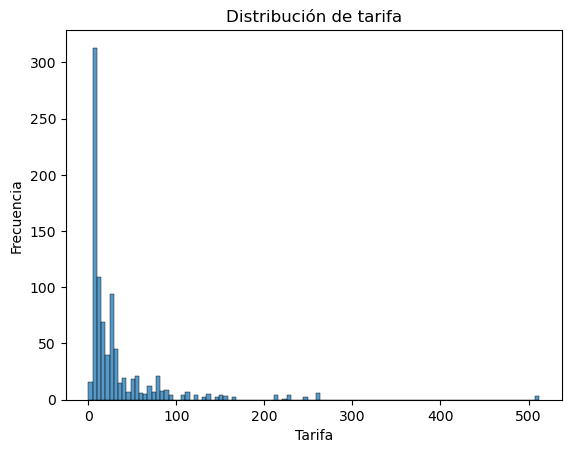

In [31]:
v_fare_hist= sns.histplot(data=df_copy['Fare'])
v_fare_hist.set_title('Distribución de tarifa')
v_fare_hist.set_xlabel('Tarifa')
v_fare_hist.set_ylabel('Frecuencia')  

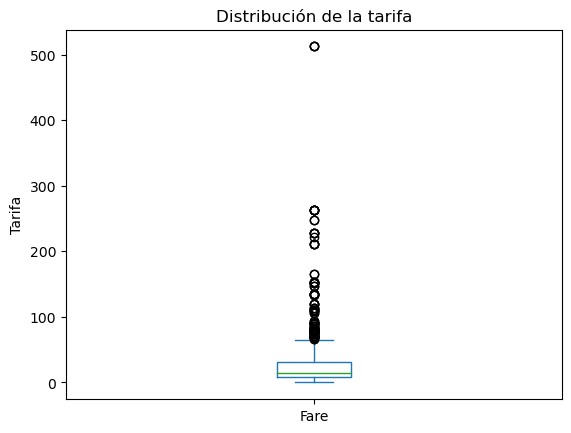

In [35]:
v_age_box=df['Fare'].plot.box(title="Distribución de la tarifa", ylabel='Tarifa')

CABINA

In [38]:
df_copy['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

ZONA DE EMBARQUE

In [41]:
df_copy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

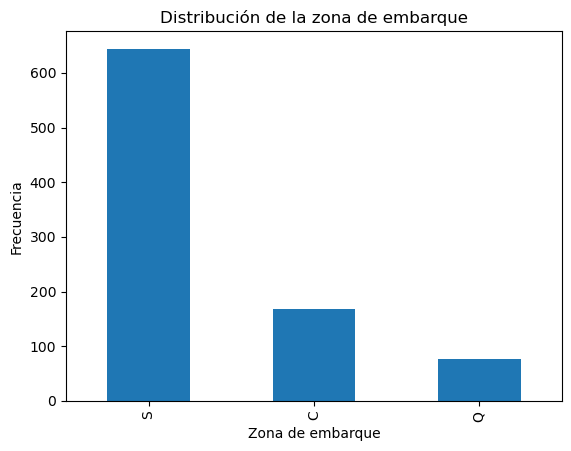

In [42]:
v_embarked_bar=df_copy['Embarked'].value_counts().plot.bar(title="Distribución de la zona de embarque",xlabel="Zona de embarque",ylabel="Frecuencia")

# Visualización de datos


Text(0, 0.5, 'Frecuencia')

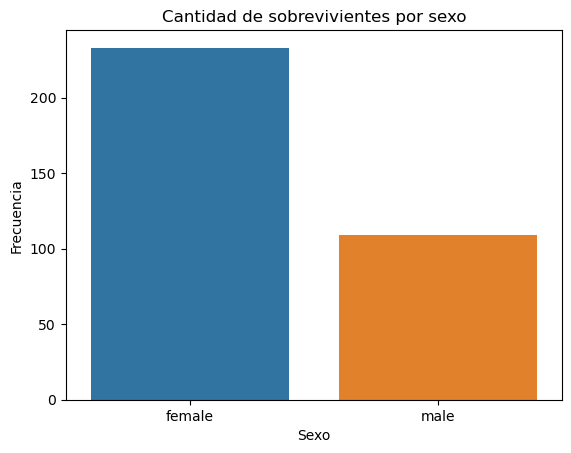

In [57]:
survived_by_sex= df_copy.groupby('Sex')['Survived'].sum().reset_index()
bar_survived_by_sex=sns.barplot(x='Sex', y='Survived', data= survived_by_sex)
bar_survived_by_sex.set_title('Cantidad de sobrevivientes por sexo')
bar_survived_by_sex.set_xlabel('Sexo')
bar_survived_by_sex.set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

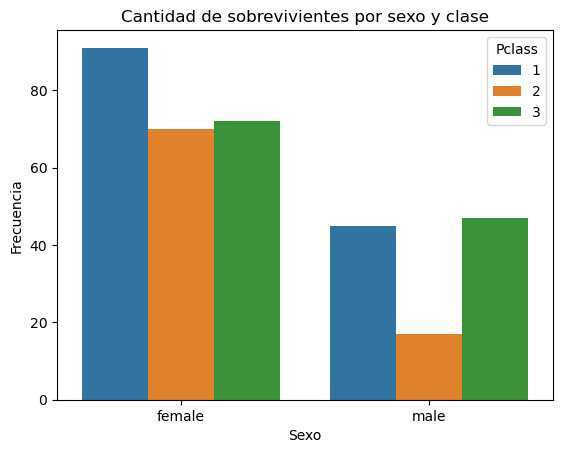

In [58]:
survived_by_sex_class= df_copy.groupby(['Pclass', 'Sex'])['Survived'].sum().reset_index() 
bar_survived_by_sex_class=sns.barplot(x='Sex', y= 'Survived',hue="Pclass",data=survived_by_sex_class)
bar_survived_by_sex_class.set_title('Cantidad de sobrevivientes por sexo y clase')
bar_survived_by_sex_class.set_xlabel('Sexo')
bar_survived_by_sex_class.set_ylabel('Frecuencia')

Text(0, 0.5, 'Tasa')

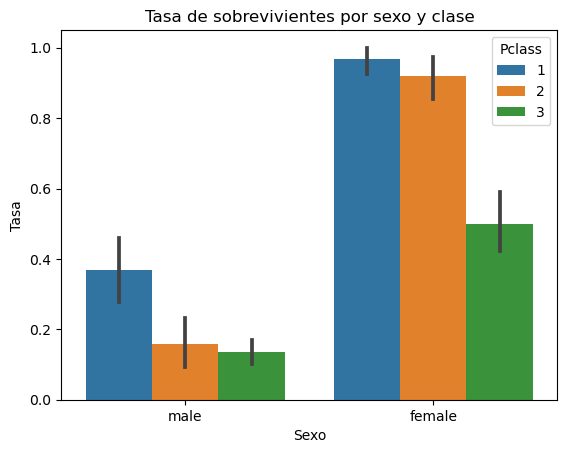

In [59]:
rate_survived_by_class_sex=sns.barplot(x='Sex', y= 'Survived',hue="Pclass",data=df_copy)
rate_survived_by_class_sex.set_title('Tasa de sobrevivientes por sexo y clase')
rate_survived_by_class_sex.set_xlabel('Sexo')
rate_survived_by_class_sex.set_ylabel('Tasa')

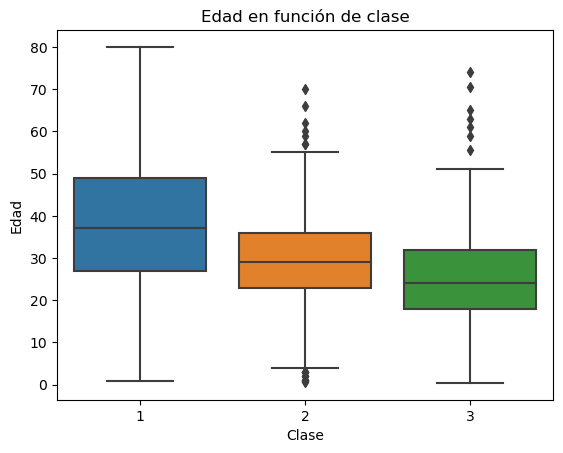

In [37]:
age_class_box=sns.boxplot(x="Pclass",y="Age", data=df_copy).set(title="Edad en función de clase",xlabel='Clase',ylabel='Edad')

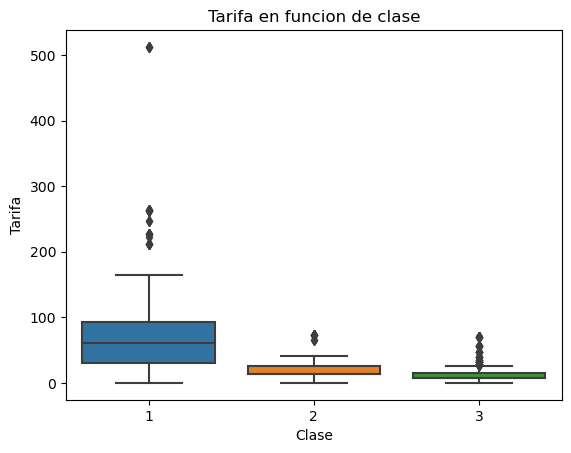

In [64]:
fare_class_box=sns.boxplot(x="Pclass",y="Fare", data=df_copy).set(title="Tarifa en funcion de clase",xlabel='Clase',
                                                                  ylabel='Tarifa')

Text(0, 0.5, 'Tarifa')

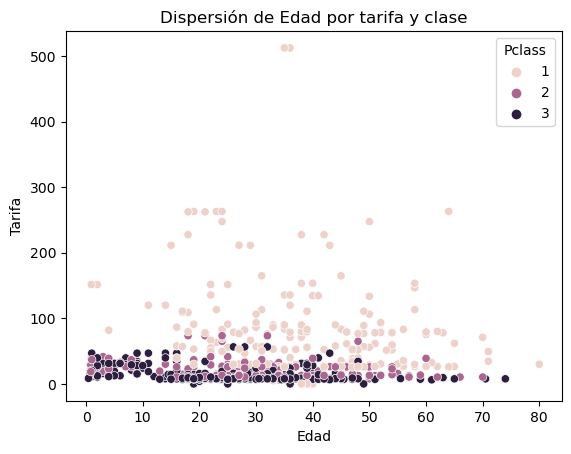

In [63]:
disp_age_by_fare_class=sns.scatterplot(data=df_copy, x="Age", y="Fare", hue='Pclass')
disp_age_by_fare_class.set_title('Dispersión de edad por tarifa y clase')
disp_age_by_fare_class.set_xlabel('Edad')
disp_age_by_fare_class.set_ylabel('Tarifa')

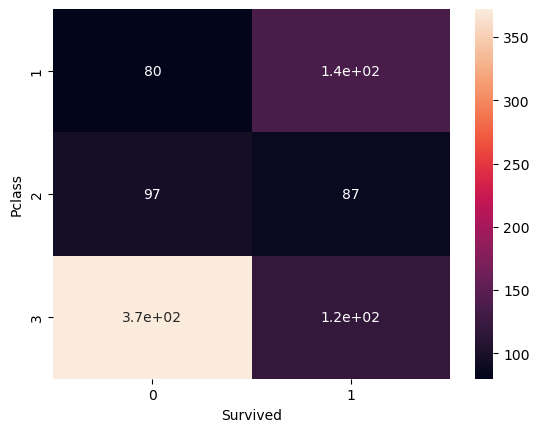

In [82]:
class_by_survived=pd.crosstab(df_copy['Pclass'], df_copy['Survived'])
heat_class_by_survived=sns.heatmap(class_by_survived,annot=True)

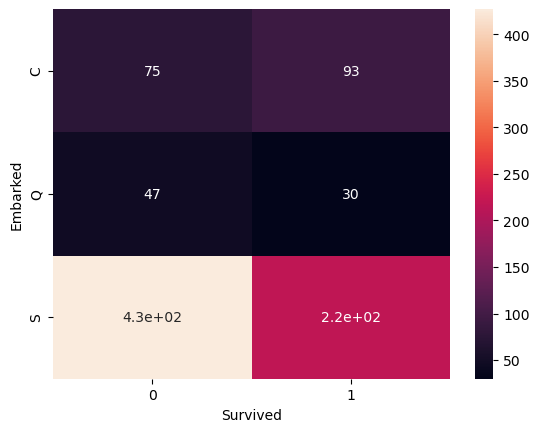

In [81]:
embarked_by_survived=pd.crosstab(df_copy['Embarked'], df_copy['Survived'])
heat_embarked_by_survived=sns.heatmap(embarked_by_survived,annot=True)

## c)Datos faltantes

In [84]:
df_copy.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
df_copy.isnull().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [86]:
for column in df_copy.columns:
    percentage = df_copy[column].isnull().mean()
    print(column +' : '+ str(round(percentage*100,2))+ ' %')  

PassengerId : 0.0 %
Survived : 0.0 %
Pclass : 0.0 %
Name : 0.0 %
Sex : 0.0 %
Age : 19.87 %
SibSp : 0.0 %
Parch : 0.0 %
Ticket : 0.0 %
Fare : 0.0 %
Cabin : 77.1 %
Embarked : 0.22 %
